Load data & check types

In [ ]:
import pandas as pd

# Load the CSV
df = pd.read_csv(r'C:\Users\hp\Desktop\acis_insurance_risk\data\raw\insurance.csv', low_memory=False)

# Numeric summary of numeric columns
print(df[['age', 'bmi', 'children', 'charges']].describe())

# Example: compute average charges by smoker status
avg_charges_by_smoker = df.groupby('smoker')['charges'].mean()
print("\nAverage charges by smoker status:")
print(avg_charges_by_smoker)

# Optional: compute BMI categories
df['BMI_Category'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
print("\nBMI categories count:")
print(df['BMI_Category'].value_counts())


               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

Average charges by smoker status:
smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

BMI categories count:
BMI_Category
Obese          705
Overweight     386
Normal         226
Underweight     21
Name: count, dtype: int64


Descriptive statistics, loss ratio

In [15]:
# Numeric summary
print(df[['age', 'bmi', 'children', 'charges']].describe())

# Example: average charges by smoker status
avg_charges_by_smoker = df.groupby('smoker')['charges'].mean()
print("\nAverage charges by smoker status:")
print(avg_charges_by_smoker)

# BMI categories
df['BMI_Category'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
print("\nBMI categories count:")
print(df['BMI_Category'].value_counts())


               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

Average charges by smoker status:
smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

BMI categories count:
BMI_Category
Obese          705
Overweight     386
Normal         226
Underweight     21
Name: count, dtype: int64


Data quality: missing values & types

In [17]:
# Check missing values
missing = df.isna().sum().sort_values(ascending=False)
print("Columns with missing values:")
print(missing[missing > 0])

# Convert categorical columns that exist in the dataset
for col in ['sex', 'smoker', 'region']:
    df[col] = df[col].astype('category')

# Verify
print(df.dtypes)


Columns with missing values:
Series([], dtype: int64)
age                int64
sex             category
bmi              float64
children           int64
smoker          category
region          category
charges          float64
BMI_Category    category
dtype: object


Univariate analysis

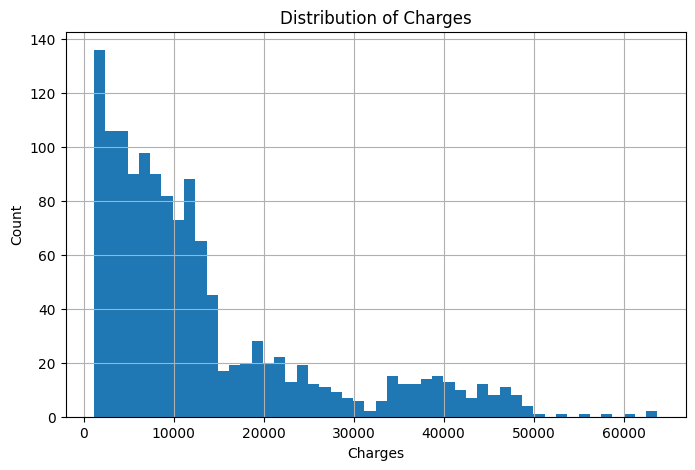

In [19]:
import matplotlib.pyplot as plt

# Histogram for charges
plt.figure(figsize=(8,5))
df['charges'].hist(bins=50)
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()


Bivariate / geography & time

      region  total_charges    avg_bmi  n_people
2  southeast   5.363690e+06  33.355989       364
0  northeast   4.343669e+06  29.173503       324
1  northwest   4.035712e+06  29.199785       325
3  southwest   4.012755e+06  30.596615       325


C:\Users\hp\AppData\Local\Temp\ipykernel_10692\4262227770.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_agg = df.groupby('region').agg(
C:\Users\hp\AppData\Local\Temp\ipykernel_10692\4262227770.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('region')['charges'].sum().plot(kind='bar', title='Total Charges by Region')


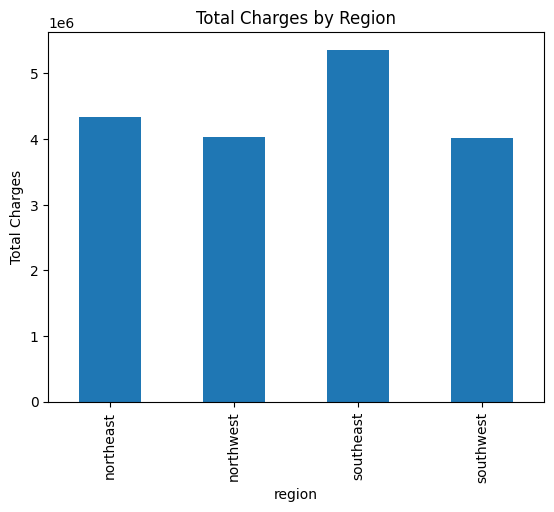

In [22]:
# Aggregate by region
region_agg = df.groupby('region').agg(
    total_charges=('charges', 'sum'),
    avg_bmi=('bmi', 'mean'),
    n_people=('age', 'count')
).reset_index().sort_values('total_charges', ascending=False)

print(region_agg)

# Histogram of charges by region
df.groupby('region')['charges'].sum().plot(kind='bar', title='Total Charges by Region')
plt.ylabel('Total Charges')
plt.show()

Outlier detection (boxplot)

<Figure size 1000x600 with 0 Axes>

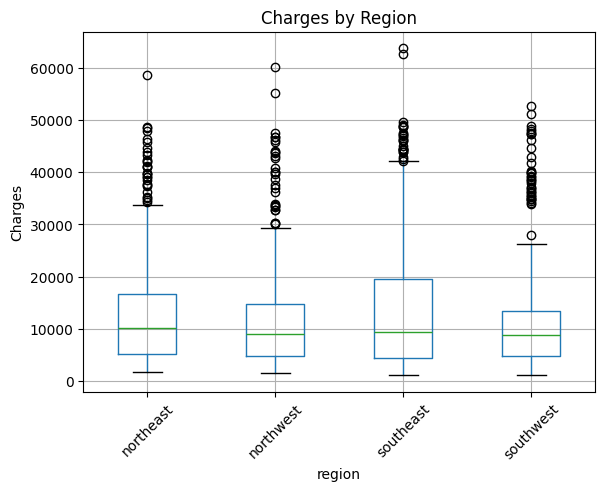

In [23]:

plt.figure(figsize=(10,6))
df.boxplot(column='charges', by='region', rot=45)
plt.title('Charges by Region')
plt.suptitle('')  # removes the automatic 'Boxplot grouped by ...' title
plt.ylabel('Charges')
plt.show()

Hypothesis testing

ANOVA: Charges by Region 

In [25]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit ANOVA model
model = ols('charges ~ C(region)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                 sum_sq      df         F    PR(>F)
C(region)  1.300760e+09     3.0  2.969627  0.030893
Residual   1.947735e+11  1334.0       NaN       NaN


ANOVA: Charges by Smoker Status

In [27]:
# ANOVA: test if average charges differ by smoker status
model_smoker = ols('charges ~ C(smoker)', data=df).fit()
anova_smoker = sm.stats.anova_lm(model_smoker, typ=2)
print(anova_smoker)


                 sum_sq      df            F         PR(>F)
C(smoker)  1.215199e+11     1.0  2177.614868  8.271436e-283
Residual   7.455432e+10  1336.0          NaN            NaN


C:\Users\hp\AppData\Local\Temp\ipykernel_10692\1614742684.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_charges = df.groupby('smoker')['charges'].mean()


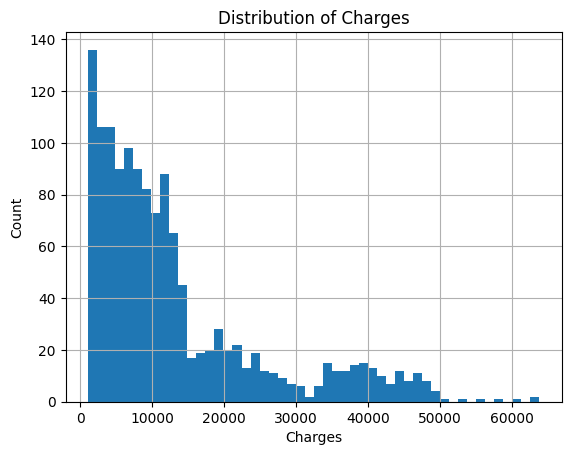

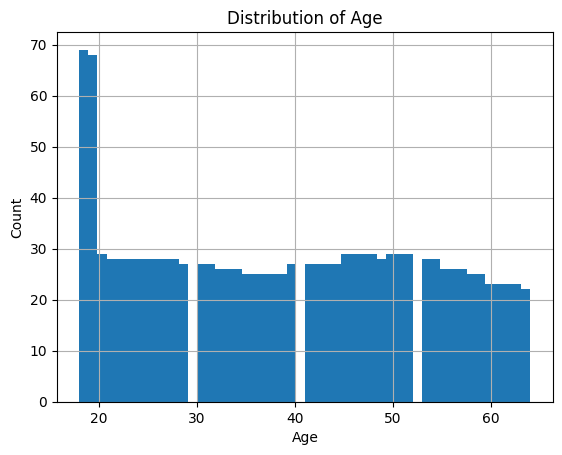

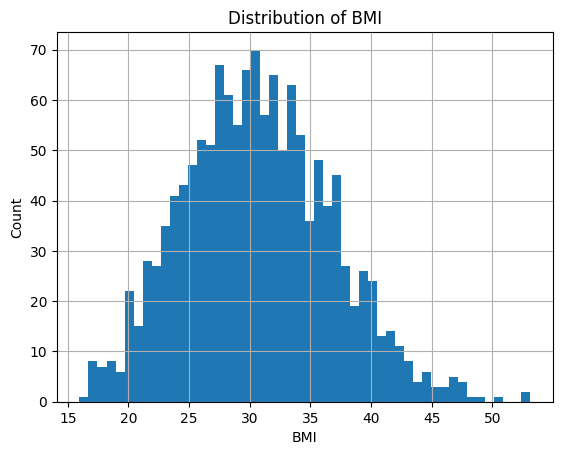

<Figure size 640x480 with 0 Axes>

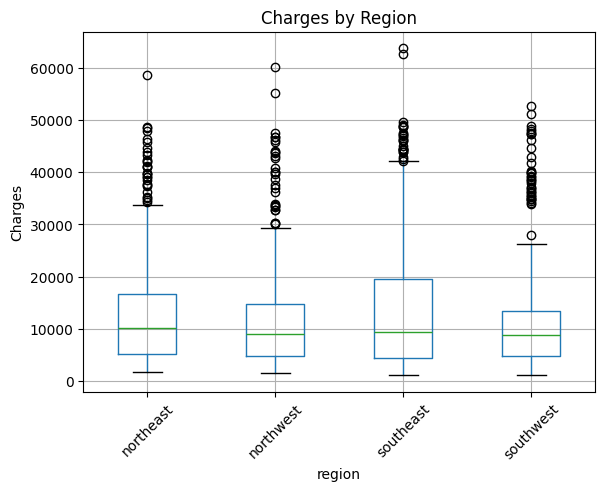

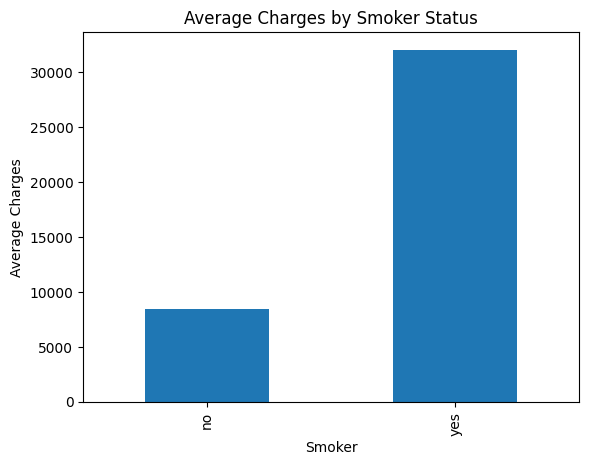

In [34]:
import matplotlib.pyplot as plt
import os

# Ensure the folder exists
output_dir = 'reports/figures'
os.makedirs(output_dir, exist_ok=True)

# ------------------------
# Histogram of charges
plt.figure()
df['charges'].hist(bins=50)
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.savefig(os.path.join(output_dir, 'charges_histogram.png'), dpi=300, bbox_inches='tight')

# ------------------------
# Histogram of age
plt.figure()
df['age'].hist(bins=50)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig(os.path.join(output_dir, 'age_histogram.png'), dpi=300, bbox_inches='tight')

# ------------------------
# Histogram of BMI
plt.figure()
df['bmi'].hist(bins=50)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.savefig(os.path.join(output_dir, 'bmi_histogram.png'), dpi=300, bbox_inches='tight')

# ------------------------
# Boxplot of charges by region
plt.figure()
df.boxplot(column='charges', by='region', rot=45)
plt.title('Charges by Region')
plt.suptitle('')
plt.ylabel('Charges')
plt.savefig(os.path.join(output_dir, 'charges_by_region.png'), dpi=300, bbox_inches='tight')

# ------------------------
# Average charges by smoker status
avg_charges = df.groupby('smoker')['charges'].mean()
plt.figure()
avg_charges.plot(kind='bar')
plt.title('Average Charges by Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Average Charges')
plt.savefig(os.path.join(output_dir, 'avg_charges_by_smoker.png'), dpi=300, bbox_inches='tight')
